In [12]:
from deap import tools, base, creator, algorithms
import random as rnd
import numpy as np
# from function_opt.ga_scheme import eaMuPlusLambda

from function_opt.draw_log import draw_log

creator.create("Fitness", base.Fitness, weights=(1.0,))
creator.create("ChessDesk", set, fitness=creator.Fitness)


c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Fitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\vando\AppData\Local\Programs\Python\Python39\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'ChessDesk' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [13]:


def count_line_value_with_step(init_idx: int, step: int, chess_desk) -> int:
    idx = init_idx
    queens_number = len(chess_desk)
    positions_num = queens_number**2
    per_line_value = 0

    while idx < positions_num: # Check vertical borders
        # print("item_idx:", idx)
        if idx in chess_desk:
            per_line_value = per_line_value + 1
            # print("add +1")

        if step == (queens_number + 1): # For main diag
            if idx % queens_number == (queens_number - 1):
                break

        if step == (queens_number - 1): # For secondary diag
            if idx % queens_number == 0:
                break

        if step == 1: # For horizontal
            if idx % queens_number == (queens_number - 1):
                break
        
        idx = idx + step

    return per_line_value**2

def count_horizontal_value(chess_desk) -> int:
    # Horizontal lines
    horizontal_value = 0
    horizontal_step = 1
    queens_number = len(chess_desk)

    for row_idx in range(queens_number):
        horizontal_value = horizontal_value + count_line_value_with_step(row_idx*queens_number, horizontal_step, chess_desk) # In order to show that more than 1 item in row is bad
    
    return horizontal_value

def count_vertical_value(chess_desk) -> int:
    # Vertical
    vertical_value = 0
    queens_number = len(chess_desk)
    vertical_step = queens_number

    for col_idx in range(queens_number):
        vertical_value = vertical_value + count_line_value_with_step(col_idx, vertical_step, chess_desk) # In order to show that more than 1 item in row is bad

    return vertical_value

def count_main_diagonal_value(chess_desk) -> int:
    # Main diag
    m_diag_value = 0
    queens_number = len(chess_desk)
    m_diag_step = queens_number + 1

    for col_idx in range(0, queens_number):
        m_diag_value = m_diag_value + count_line_value_with_step(col_idx, m_diag_step, chess_desk) # In order to show that more than 1 item in row is bad
    for row_idx in range(1, queens_number):
        m_diag_value = m_diag_value + count_line_value_with_step(row_idx*queens_number, m_diag_step, chess_desk) # In order to show that more than 1 item in row is bad

    return m_diag_value

def count_secondary_diagonal_value(chess_desk) -> int:
    # Secondary diag
    s_diag_value = 0
    queens_number = len(chess_desk)
    s_diag_step = queens_number - 1

    for col_idx in range(0, queens_number):
        s_diag_value = s_diag_value + count_line_value_with_step(col_idx, s_diag_step, chess_desk) # In order to show that more than 1 item in row is bad
    for row_idx in range(1, queens_number):
        s_diag_value = s_diag_value + count_line_value_with_step(row_idx*queens_number+(queens_number-1), s_diag_step, chess_desk) # In order to show that more than 1 item in row is bad

    return s_diag_value

def fitness(chess_desk):
    value: float = count_horizontal_value(chess_desk) + \
        count_vertical_value(chess_desk) + \
        count_main_diagonal_value(chess_desk) + \
        count_secondary_diagonal_value(chess_desk)
    return 1 / value 



N = 5
# All horizontal
tmp_chess_desk = {i+N for i in range(N)}
# All vertical
# tmp_chess_desk = {i*N+4 for i in range(N)}
# All main diag
# tmp_chess_desk = {i*N+i for i in range(N)}
# All secondary diag
# tmp_chess_desk = {i*(N-1)+(N-1) for i in range(N)}

print("horizontal_value", count_horizontal_value(tmp_chess_desk))

print("vertical_value", count_vertical_value(tmp_chess_desk))

print("m_diag_value", count_main_diagonal_value(tmp_chess_desk))

print("s_diag_value", count_secondary_diagonal_value(tmp_chess_desk))

print(fitness(tmp_chess_desk))

horizontal_value 25
vertical_value 5
m_diag_value 5
s_diag_value 5
0.025


In [14]:
def crossover(chess_desk_1, chess_desk_2):
    child_1 = set()
    child_2 = set()
    concat_chess_desk = []

    for item in chess_desk_1:
        concat_chess_desk.append(item)
    
    for item in chess_desk_2:
        concat_chess_desk.append(item)

    concat_chess_desk = sorted(concat_chess_desk)

    for idx in range(0, len(concat_chess_desk), 2):
        child_1.add(concat_chess_desk[idx])
        child_2.add(concat_chess_desk[idx+1])

    return child_1, child_2



# All horizontal
hor_chess_desk = {i for i in range(N)}
# All vertical
ver_chess_desk = {i*N for i in range(N)}
# All main diag
mdiag_chess_desk = {i*N+i for i in range(N)}
# All secondary diag
sdiag_chess_desk = {i*(N-1)+(N-1) for i in range(N)}

print(hor_chess_desk)
print(mdiag_chess_desk)

res1,res2 = crossover(hor_chess_desk, mdiag_chess_desk)
print(res1)
print(res2)

{0, 1, 2, 3, 4}
{0, 6, 12, 18, 24}
{0, 1, 3, 6, 18}
{0, 2, 4, 12, 24}


In [15]:
# Mutation
def get_random_from_desk(chess_desk) -> int:
    queens_number = len(chess_desk)
    while True:
        position = rnd.randint(0, queens_number**2 - 1)
        if not position in chess_desk:
            break
    return rnd.choice(tuple(chess_desk)), position

def get_mutations_number(chess_desk) -> int:
    queens_number: int = len(chess_desk)
    return queens_number // 10 + 1

def mutation(chess_desk):
    for mitation in range(get_mutations_number(chess_desk)):
        position_to_remove, position_to_add = get_random_from_desk(chess_desk)

        chess_desk.remove(position_to_remove)
        chess_desk.add(position_to_add)

    return chess_desk


print(hor_chess_desk)
print(mdiag_chess_desk)

print(mutation(hor_chess_desk))
print(mutation(mdiag_chess_desk))

{0, 1, 2, 3, 4}
{0, 6, 12, 18, 24}
{1, 2, 3, 4, 7}
{0, 6, 8, 18, 24}


In [16]:

class QueenProblem:
    def factory(self):
        # create individ
        chess_desk = set()
        for _ in range(self.queen_number):
            while True:
                position = rnd.choice(self.initial_queen_pool)
                if not position in chess_desk: # Add only unique
                    chess_desk.add(position)
                    break
        chess_desk = creator.ChessDesk(chess_desk)
        return chess_desk

    def fitness(self, chess_desk):
        return fitness(chess_desk),

    def mutation(self, mutant):
        return mutation(mutant),

    def crossover(self, b1, b2):
        c1, c2 = crossover(b1, b2)
        return creator.ChessDesk(c1), creator.ChessDesk(c2)


    def __init__(self, queen_number, initial_queen_pool):
        self.initial_queen_pool = initial_queen_pool

        # factory
        self.queen_number = queen_number

        self.engine = base.Toolbox()
        self.engine.register("individual", self.factory)
        # need popsize here?
        self.engine.register("population", tools.initRepeat, list, self.engine.individual)
        self.engine.register("mutate", self.mutation)
        self.engine.register("mate", self.crossover)
        # self.engine.register("select", tools.selNSGA2)
        # self.engine.register("select", tools.selRoulette)
        self.engine.register("select",tools.selTournament, tournsize=10)
        
        self.engine.register("evaluate", self.fitness)

    def run(self):
        pop_size = self.queen_number * 10
        iterations = 1000

        pop = self.engine.population(pop_size)
        hof = tools.HallOfFame(5)
        stats = tools.Statistics(lambda ind: ind.fitness.values)
        stats.register("avg", np.mean, axis=0)
        stats.register("std", np.std, axis=0)
        stats.register("min", np.min, axis=0)
        stats.register("max", np.max, axis=0)

        pop, log = algorithms.eaMuPlusLambda(pop, self.engine, mu=pop_size, lambda_=int(pop_size*0.8),
                                  cxpb=0.3, mutpb=0.7, stats=stats, halloffame=hof, ngen=iterations)

        print("Best = {}".format(hof[0]))
        print("Best fit = {}".format(hof[0].fitness.values[0]))

        return pop, log, hof[0]


In [17]:
def solve_queen_problem(queen_number: int):
    queen_number = queen_number
    # rnd.seed(10)
    initial_queen_pool_number = queen_number * 600

    # Only unique
    initial_queen_pool = {rnd.randint(0, queen_number) for i in range(initial_queen_pool_number)}
    problem = QueenProblem(queen_number, list(initial_queen_pool))
    pop, log, best_desk = problem.run()

    return pop, log, best_desk


In [18]:
# pop,log = solve_queen_problem(queen_number = 15)

# draw_log(log)

gen	nevals	avg         	std         	min         	max         
0  	80    	[0.01271987]	[0.00049999]	[0.01136364]	[0.01315789]
1  	64    	[0.01473023]	[0.00051568]	[0.01315789]	[0.015625]  
2  	64    	[0.01663981]	[0.00075492]	[0.01470588]	[0.01785714]
3  	64    	[0.01860937]	[0.00095454]	[0.01724138]	[0.02083333]
4  	64    	[0.02078452]	[0.00100615]	[0.01923077]	[0.02272727]
5  	64    	[0.02250274]	[0.00082806]	[0.02083333]	[0.02380952]
6  	64    	[0.0237903] 	[0.00076325]	[0.02272727]	[0.02631579]
7  	64    	[0.0250188] 	[0.00112033]	[0.02380952]	[0.02631579]
8  	64    	[0.02621711]	[0.00034657]	[0.025]     	[0.02631579]
9  	64    	[0.02631579]	[0.]        	[0.02631579]	[0.02631579]
10 	64    	[0.02638889]	[0.00031863]	[0.02631579]	[0.02777778]
11 	64    	[0.02686404]	[0.00070778]	[0.02631579]	[0.02777778]
12 	64    	[0.02766813]	[0.00038508]	[0.02631579]	[0.02777778]
13 	64    	[0.02777778]	[6.9388939e-18]	[0.02777778]	[0.02777778]
14 	64    	[0.02777778]	[6.9388939e-18]	[0.02777778]

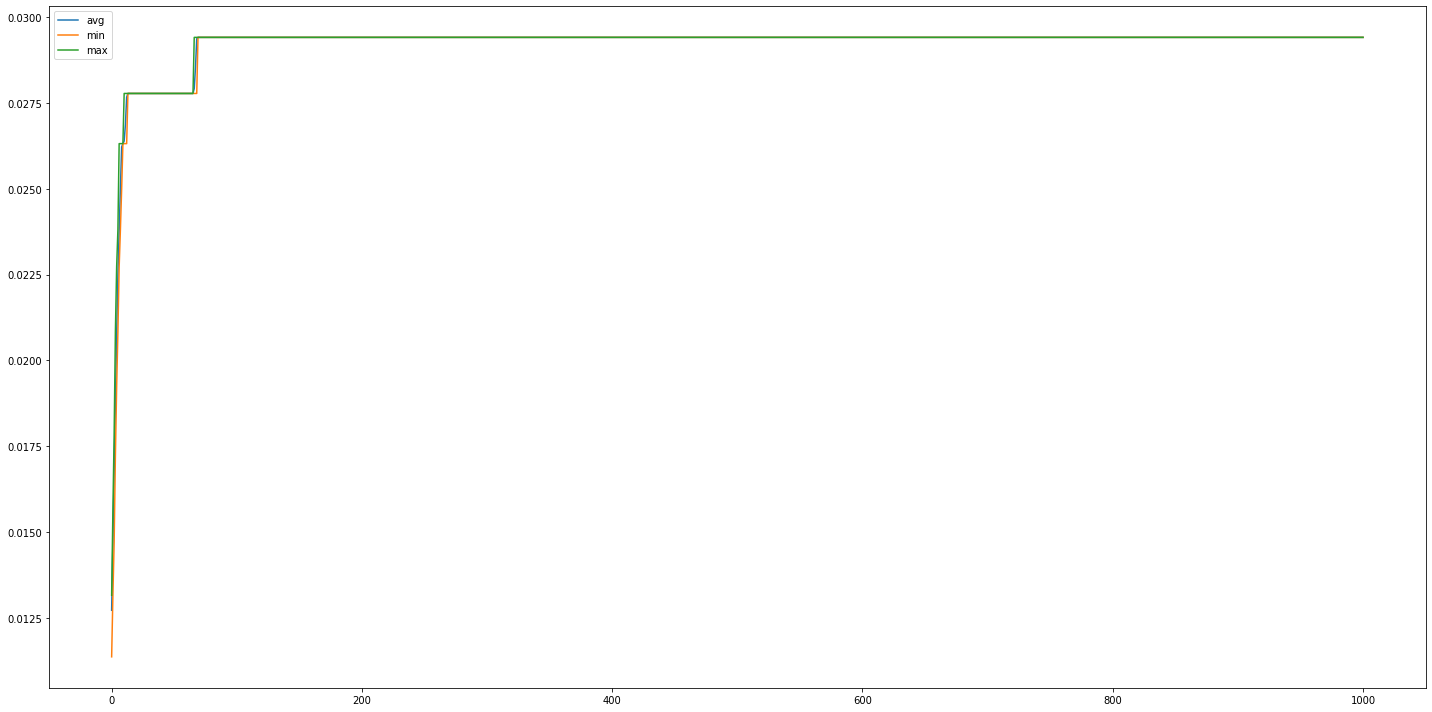

In [19]:
pop,log, desk = solve_queen_problem(queen_number = 8)

draw_log(log)


In [22]:
from function_opt.draw_log import draw_queens_on_desk

draw_queens_on_desk(desk)

ImportError: cannot import name 'draw_queens_on_desk' from 'function_opt.draw_log' (e:\Data\UCHEBA\ИТМО_3_курс\EvolutionComp\function_opt\draw_log.py)